### Nama : Muhamad Kurniawan Fauzi
### NIM : 5312422037
### Prodi : Teknik Komputer
---

# Windows


Mari kita jelajahi beberapa jenis fungsi jendela untuk mendapatkan attenuasi stopband yang lebih tinggi. Terdapat dua versi yang umum digunakan, tergantung pada panjang jendela yang genap atau ganjil. Sekarang kita akan menganalisis beberapa jenis jendela yang umum digunakan.

Kita akan memulai dengan jendela persegi (rectangular window).

Jendela persegi didefinisikan sebagai:
$h(n) = 1, \text{ untuk } n = 0, 1, \dots, L-1$

Di Python, kita dapat menghitung respons frekuensi jendela persegi untuk $( L = 16 )$:

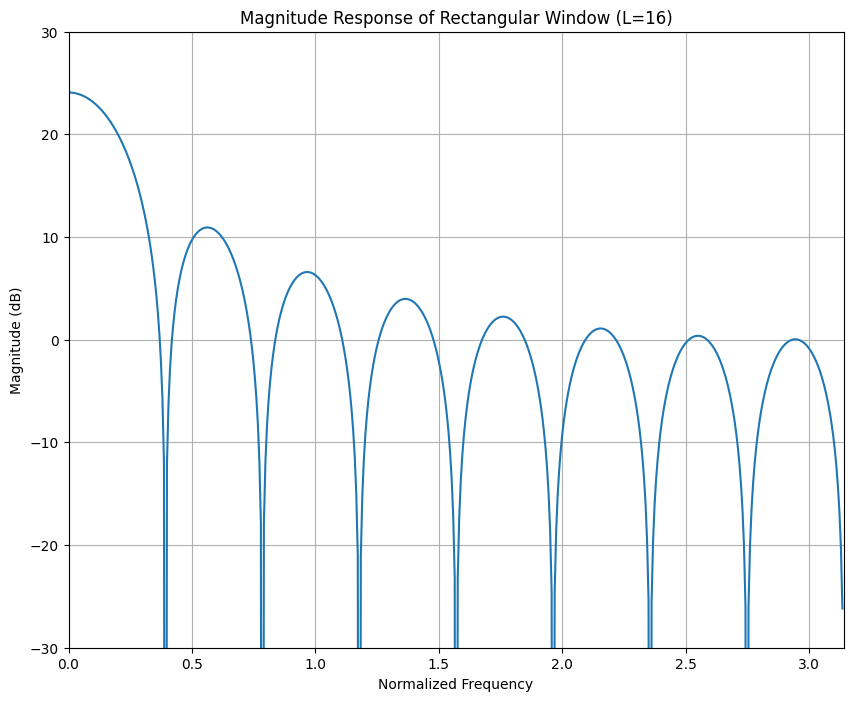

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Define rectangular window
h = np.ones(16)

# Compute frequency response
omega, H = signal.freqz(h)

# Plot magnitude response
plt.figure(figsize=(10, 8))
plt.plot(omega, 20 * np.log10(abs(H) + 1e-6))
plt.axis([0, 3.14, -30, 30])
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.title('Magnitude Response of Rectangular Window (L=16)')
plt.show()


Dalam plot di atas, kita melihat respons magnitudo dari jendela persegi. Jendela ini memiliki karakteristik yang sederhana, di mana respons frekuensinya menunjukkan perubahan tiba-tiba antara nilai tinggi (0 dB) dan nilai rendah (-∞ dB) pada batas frekuensi.

Penting untuk dicatat bahwa jendela persegi memiliki riak-riak yang signifikan di sekitar passband dan stopband, serta attenuasi stopband yang relatif rendah. Hal ini sering tidak cukup untuk aplikasi di mana attenuasi stopband yang tinggi diperlukan.

Dalam konteks desain filter FIR, karakteristik jendela persegi menunjukkan riak-riak yang signifikan di sekitar passband dan stopband, serta attenuasi stopband yang relatif rendah. Hal ini sering tidak memadai untuk aplikasi di mana attenuasi stopband yang tinggi diperlukan.

Ketika kita ingin meningkatkan performa filter dengan jendela yang lebih baik, kita dapat mempertimbangkan metode untuk menilai dan membandingkan kualitasnya. Salah satu pendekatan adalah dengan menggunakan fungsi error yang memperhitungkan kesalahan antara respons frekuensi filter dengan respons frekuensi yang diinginkan.

Berikut adalah contoh fungsi Python yang digunakan untuk menghitung error (errfunc) berdasarkan respons frekuensi sebuah filter FIR (h), dengan mempertimbangkan target passband dan transition band yang diinginkan:

Observe: Its main lobe has a 3dB width of about $0.05 \pi \approx 0.16$, the side lobe attenuation is about -15 to -25 dB.<br>
We can design different windows, which de-emphasize a transition region from passband to stopband, and emphasize the stopband attenuation more than the passband attenuation.

This can be seen as minimizing a **weighted** squared error function, where the parts the we want to emphasize get a higher weight.

In Python we can formulate an error function with a weighted squared error as follows, with pb, tb: number of frequency samples in the passband and transitionband, respectively,

In [3]:
import numpy as np
import scipy.signal as signal

def errfunc(h):
    numfreqsamples = 512

    # Panjang passband yang diinginkan
    pb = int(numfreqsamples / 4.0)

    # Panjang transition band yang diinginkan
    tb = int(numfreqsamples / 8.0)

    # Menghitung respons frekuensi dari filter FIR
    w, H = signal.freqz(h, 1, numfreqsamples)

    # Respons frekuensi yang diinginkan (ideal)
    H_desired = np.concatenate((np.ones(pb), np.zeros(numfreqsamples - pb)))

    # Pembobotan untuk mengukur kesalahan
    weights = np.concatenate((np.ones(pb), np.zeros(tb), 1000 * np.ones(numfreqsamples - pb - tb)))

    # Menghitung kesalahan menggunakan fungsi error
    err = np.sum(np.abs(H - H_desired) * weights)

    return err


#### View H Desired and Weights

Setelah menghitung fungsi kesalahan (errFunc) untuk mengevaluasi respons frekuensi filter FIR, kita dapat melanjutkan dengan menentukan panjang passband dan transition band yang diinginkan. Dalam konteks desain filter, panjang passband dan transition band ini mempengaruhi karakteristik respons frekuensi yang diinginkan.

Berikut adalah grafik yang menggambarkan panjang passband dan transition band yang diinginkan:

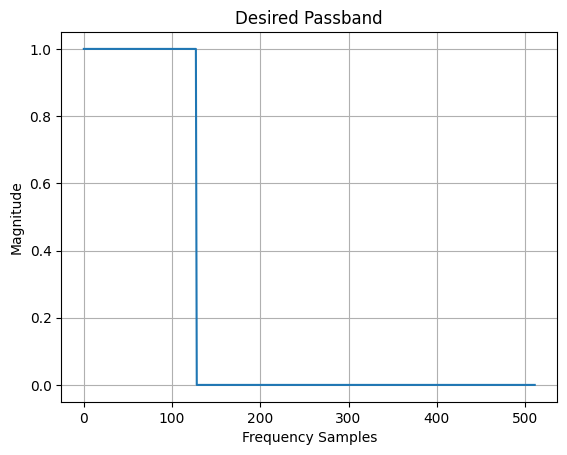

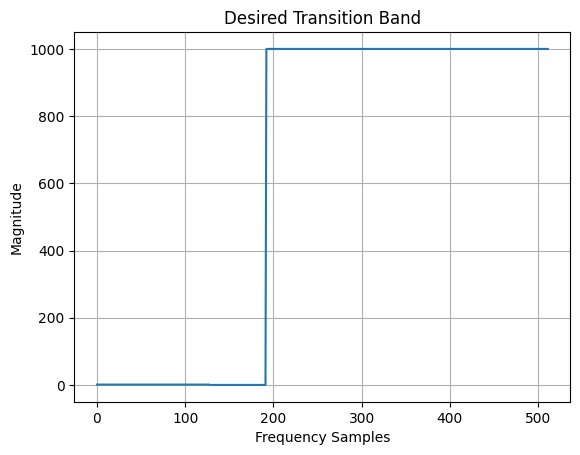

In [4]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples = 512

# Panjang passband yang diinginkan
pb = int(numfreqsamples / 4.0)

# Panjang transition band yang diinginkan
tb = int(numfreqsamples / 8.0)

# Grafik untuk respons frekuensi yang diinginkan (passband)
plt.figure()
plt.plot(np.concatenate((np.ones(pb), np.zeros(numfreqsamples - pb))))
plt.title('Desired Passband')
plt.xlabel('Frequency Samples')
plt.ylabel('Magnitude')
plt.grid()

# Grafik untuk respons frekuensi yang diinginkan (transition band)
plt.figure()
plt.plot(np.concatenate((np.ones(pb), np.zeros(tb), 1000 * np.ones(numfreqsamples - pb - tb))))
plt.title('Desired Transition Band')
plt.xlabel('Frequency Samples')
plt.ylabel('Magnitude')
plt.grid()

plt.show()


Grafik-grafik ini mengilustrasikan tampilan dari respons frekuensi yang diinginkan untuk passband dan transition band. Panjang dan karakteristik dari kedua bagian ini penting dalam desain filter, karena mereka mempengaruhi kinerja dan karakteristik dari filter FIR yang akan kita implementasikan. Penentuan panjang dan lebar band ini didasarkan pada spesifikasi aplikasi yang bersangkutan, di mana attenuasi dan selektivitas filter menjadi faktor kunci dalam keberhasilan implementasi.


Kemudian, kita dapat menggunakan optimisasi untuk mendapatkan sampel jendela atau filter yang meminimalkan kesalahan ini, misalnya dengan menggunakan "scipy.optimize". Dalam contoh ini, sebuah jendela atau filter h (tergantung pada cara penggunaannya) dengan panjang 16 sampel atau tap diperoleh dengan menggunakan pendekatan berikut:

In [5]:
import scipy.optimize as opt

# Melakukan optimisasi dengan meminimalkan fungsi kesalahan
minout=opt.minimize(errfunc,np.random.rand(16))
# Filter atau jendela yang dihasilkan
h=minout.x
print(h)


[-0.00048199 -0.00258028 -0.00796103 -0.01810629 -0.03317854 -0.05103747
 -0.06744545 -0.07761892 -0.07817272 -0.06886759 -0.05279707 -0.03474494
 -0.01916659 -0.00851102 -0.00280873 -0.0005438 ]


Setelah memperoleh hasil optimasi untuk filter $h$, kita dapat melihat respons impuls filter tersebut dengan menggambar grafik dari nilai-nilai filter $h$. Berikut adalah contoh kode untuk menggambar respons impuls dari filter yang dihasilkan:

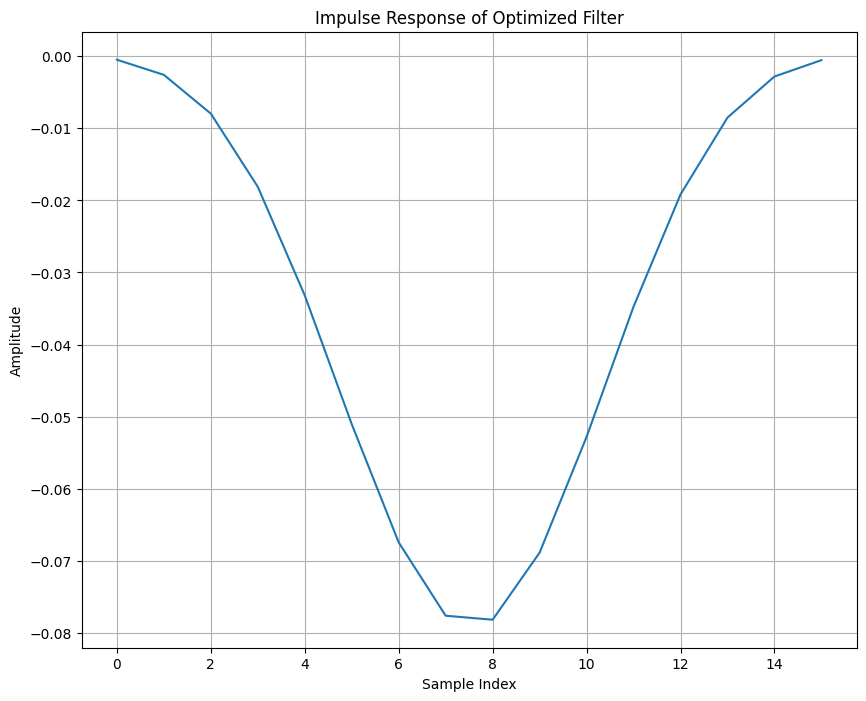

In [6]:
import matplotlib.pyplot as plt

# Menggambar respons impuls dari filter hasil optimasi
plt.figure(figsize=(10, 8))
plt.plot(h)
plt.grid()
plt.title('Impulse Response of Optimized Filter')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()


Dengan menjalankan kode di atas, kita dapat melihat grafik respons impuls dari filter yang dihasilkan melalui optimisasi. Grafik ini akan menunjukkan bagaimana filter merespons terhadap impuls pada berbagai indeks sampel, yang mencerminkan karakteristik filter yang telah dioptimalkan sesuai dengan spesifikasi yang diinginkan. Di sini negatif tidak diperhatikan karena optimasi hanya diterapkan pada magnitudenya saja.

Setelah mendapatkan respons impuls filter yang dioptimalkan, kita dapat melanjutkan untuk memeriksa magnitude dari respons frekuensi filter tersebut. Kita dapat menggunakan kode berikut untuk mengevaluasi magnitude respons frekuensi dari filter yang dihasilkan:

python


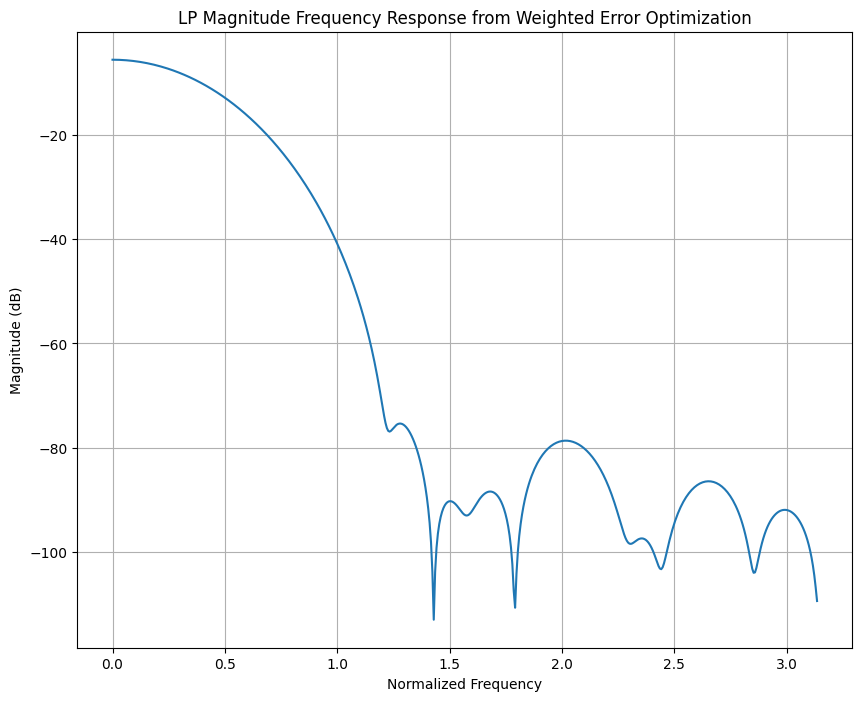

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# Mendapatkan respons frekuensi dari filter yang dioptimalkan
omega, H = signal.freqz(h)

# Menggambar magnitude respons frekuensi dalam skala dB
plt.figure(figsize=(10, 8))
plt.plot(omega, 20 * np.log10(abs(H) + 1e-6))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('LP Magnitude Frequency Response from Weighted Error Optimization')
plt.grid()
plt.show()


Dalam grafik tersebut, kita dapat mengamati stopband attenuation yang relatif tinggi, sekitar -80 dB, yang menunjukkan bahwa filter yang dihasilkan dari optimisasi memiliki performa yang baik dalam mengisolasi frekuensi yang tidak diinginkan.

Biasanya, optimisasi seperti ini memberikan solusi terbaik untuk sebagian besar aplikasi. Namun, terdapat juga variasi "jendela yang sudah jadi" untuk desain filter, yang menawarkan berbagai trade-off antara lebar transition band dan stopband attenuation untuk kenyamanan dalam aplikasi filter.

## Raise Cosine Window (Hann- or Hanning Window)

Salah satu variasi jendela yang umum digunakan adalah raised cosine window, juga dikenal sebagai Hann- atau Hanning Window:

$$\large
 {h ( n ) =0.5 - 0.5cos \left(  \frac{  2π}   {L}   ( n+0. 5 )  \right) }
$$
,dengan n=0,…,L-1, untuk panjang window L yang genap.

Mari kita lihat contoh raised cosine window dengan panjang jendela genap $L=16$:


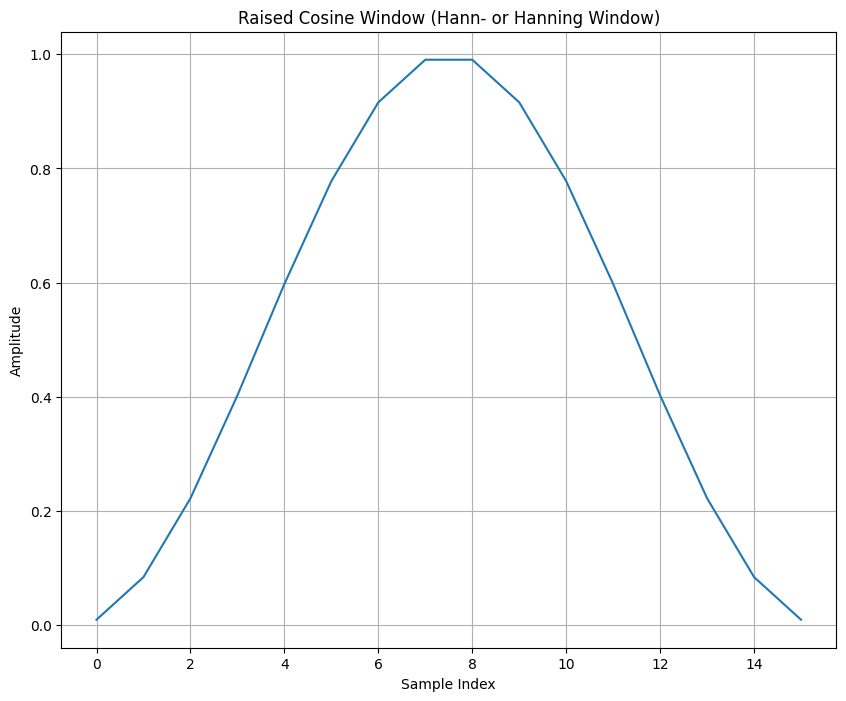

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# Membuat raised cosine window
L = 16
h = 0.5 - 0.5 * np.cos(2 * np.pi / L * (np.arange(L) + 0.5))

# Plot raised cosine window
plt.figure(figsize=(10, 8))
plt.plot(h)
plt.grid()
plt.title('Raised Cosine Window (Hann- or Hanning Window)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()


Perhatikan bahwa titik tengah berada di antara dua sampel!

Selanjutnya, kita dapat melihat respons frekuensi dari raised cosine window ini menggunakan fungsi freqz:

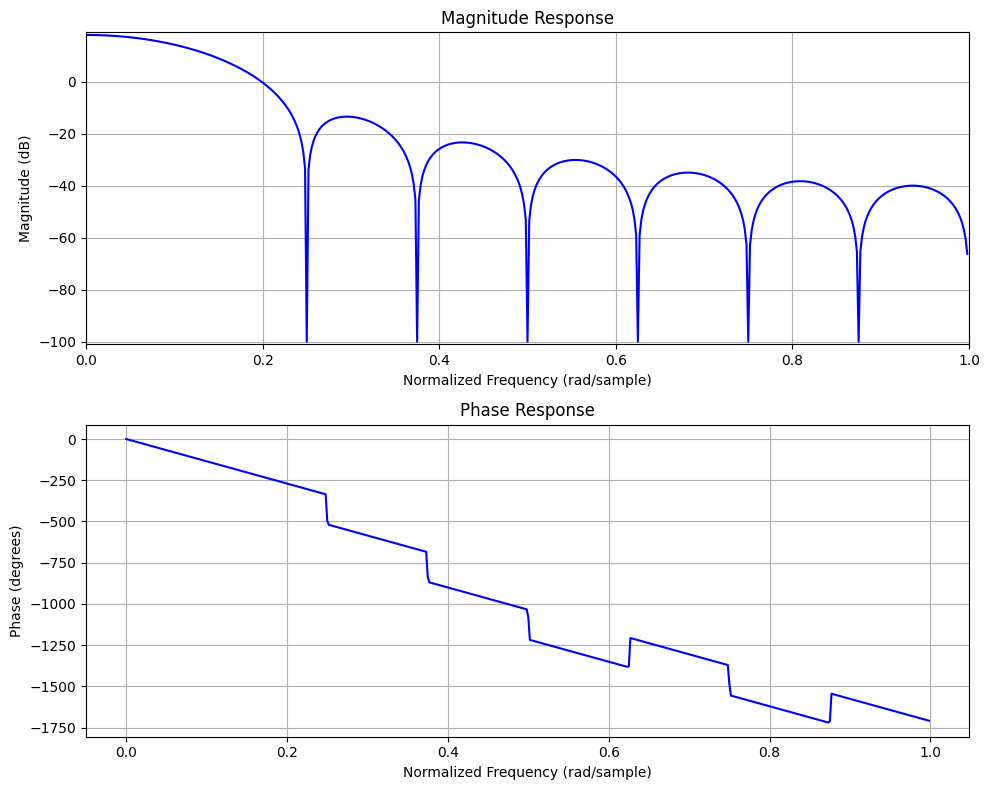

In [9]:
def freqz(x):
    # Mendapatkan respons frekuensi
    f, H = signal.freqz(x)

    # Normalisasi frekuensi
    fNorm = f / np.pi

    # Menghitung magnitude dalam dB
    hdB = 20 * np.log10(abs(H) + 1e-5)  # "+1e-5" untuk menghindari log10(0)!

    # Plot magnitude dan fase
    plt.figure(figsize=(10, 8))

    # Plot magnitude
    plt.subplot(211)
    plt.plot(fNorm, hdB, 'b')
    plt.title('Magnitude Response')
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.axis([0, 1, np.min(hdB) - 1, np.max(hdB) + 1])

    # Plot phase
    plt.subplot(212)
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles) / (2 * np.pi)
    plt.plot(fNorm, anglesGrad, 'b')
    plt.title('Phase Response')
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

# Memanggil fungsi freqz untuk raised cosine window
freqz(h)


Di sini, kita dapat melihat bahwa dengan menggunakan raised cosine window (Hann- atau Hanning Window), kita dapat mencapai attenuasi samping yang jauh lebih tinggi (dibandingkan dengan fungsi persegi) sekitar -35 dB (diukur dari puncak lobe utama, yaitu pass band), dan di bagian stop band yang jauh, kita mendapatkan attenuasi sekitar -60 dB!

Namun, ini datang dengan biaya lebar lobe utama yang lebih besar (lebarnya 3 dB sekitar $0.1\pi$, dua kali lebih lebar daripada jendela persegi), yang menghasilkan transition band yang lebih lebar.

Ini menunjukkan trade-off umum dalam desain filter: kita dapat menukar lebar transition band dengan attenuasi stop-band.

Untuk panjang window ganjil, kita mendapatkan:

$$\large
h(n)=0.5-0.5cos \left(\frac{2\pi}{L+1}(n+1)\right)
; n=0,…,L-1.$$

Berikut adalah contoh untuk $L=17$ (jumlah sampel dari impulse response, yang sama dengan koefisien, karena ini mewakili filter FIR):

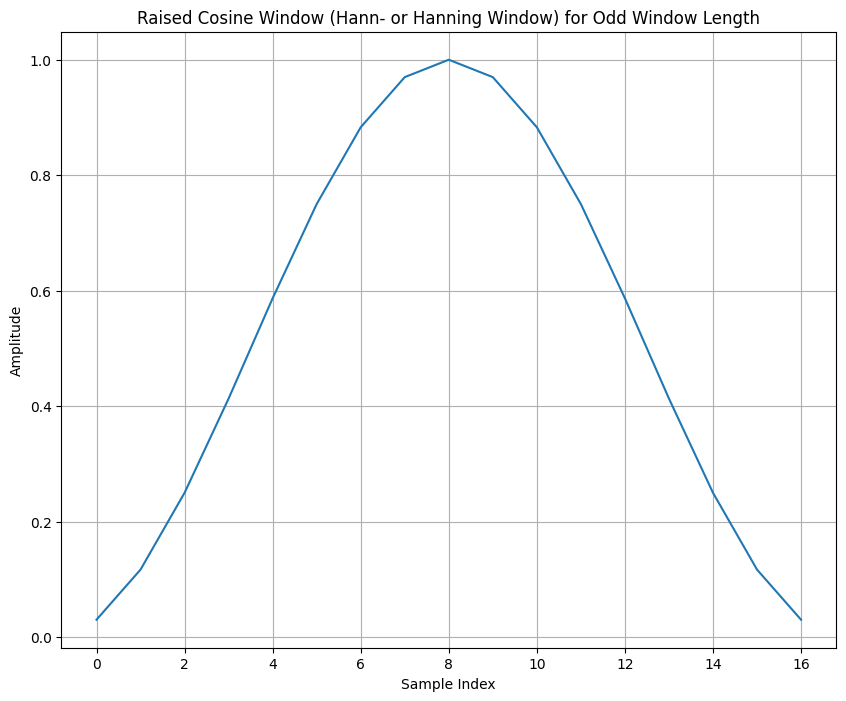

In [10]:
L = 17
h_odd = 0.5 - 0.5 * np.cos(2 * np.pi / (L + 1) * (np.arange(L) + 1))

plt.figure(figsize=(10, 8))
plt.plot(h_odd)
plt.grid()
plt.title('Raised Cosine Window (Hann- or Hanning Window) for Odd Window Length')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()


Di sini, pusatnya berada tepat pada satu sampel!

Untuk Sine window, kita memiliki:

$$\large
h(n)=sin(\frac{\pi}{L}(n+0.5))$$

dengan $n=0,…,L-1$ untuk panjang window $L$ yang genap, atau

$$\large
h(n)=sin(\frac{\pi}{L+1}(n+1))
$$
dengan $n=0,…,L-1$ untuk panjang window $L$ yang ganjil.

Berikut contoh untuk L=16:

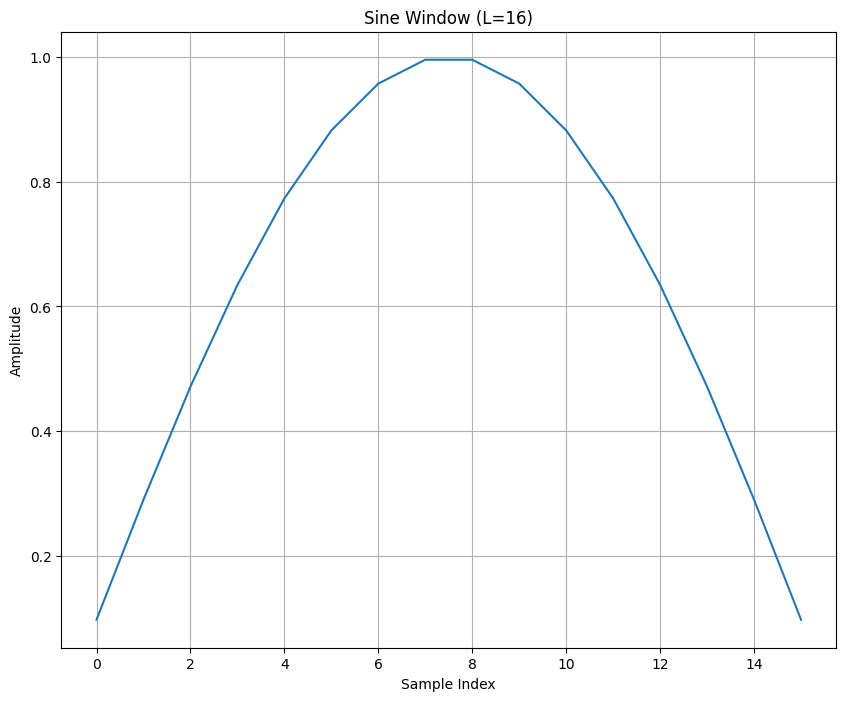

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung koefisien Sine window
s = np.sin(np.pi/16 * (np.arange(16) + 0.5))

# Plot Sine window
plt.figure(figsize=(10, 8))
plt.plot(s)
plt.grid()
plt.title('Sine Window (L=16)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()


Respon frekuensinya menjadi

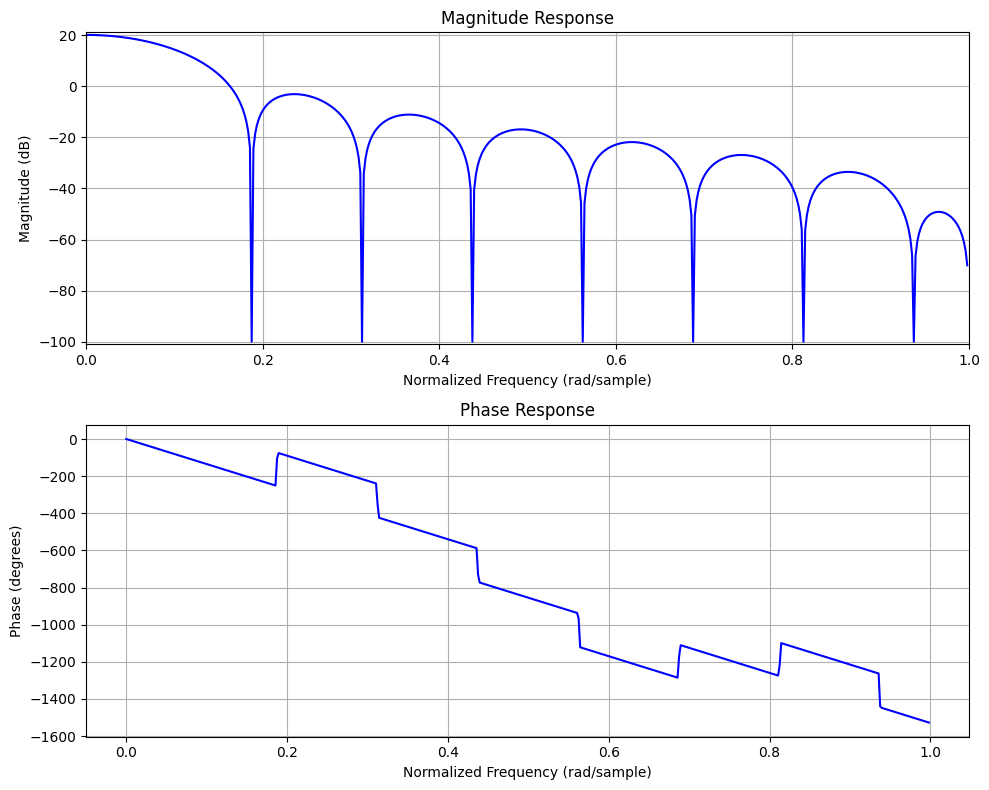

In [12]:
freqz(s)

Dengan Sine window, kita melihat bahwa lob utama lebih sempit dibandingkan dengan raised cosine window, dengan lebar 3dB sekitar $0.04\pi$. Namun, penurunan pada sisi pertama hanya sekitar -20 dB. Namun, penurunan di sisi lebih lanjut meningkat. Penurunan ini lebih besar daripada jendela persegi, tetapi lebih rendah daripada raised cosine window. Di sisi lain, lebar transisi-nya lebih kecil dibandingkan dengan raised cosine window.

Perlu diperhatikan bahwa fungsi window selalu menghasilkan nilai positif, dan mereka simetris secara sempurna (untuk panjang ganjil terdapat satu sampel tepat di tengah, untuk panjang jendela genap pusatnya tepat di antara dua sampel tengah).

## Kaiser Window

Dikenal juga dengan sebutan Kaiser Window:

$$\large
h ( n ) = 0.5 \cdot  \dfrac{I _{0}\left (β \sqrt {1 -  \left( \frac  {2n}   {L}   \right) ^{2} }   \right )}{I _{0}( β )}  
$$
, untuk $\mid n \mid \leq L/2$

(di mana representasi ini tidak kausal) di mana fungsi Bessel digunakan,

$$\large
 {I_{0}   ( x ) =1+ \sum _ { k=1}   ^ { { \infty } }  { \left [ {  \frac{ ( 0.5x ) ^ {{2} } k}   {k!} }  \right ]}  ^ {{2} } }
$$

di mana dalam desain praktis seringkali digunakan 20 suku pertama (Strang, Nguyen, “Wavelets and Filter Banks”). Parameter $\beta$ digunakan untuk menukar lebar transisi dari filter dan attenuasi stopband-nya.

Contoh untuk $L=16$ dan $\beta=2$, menggunakan iPython:

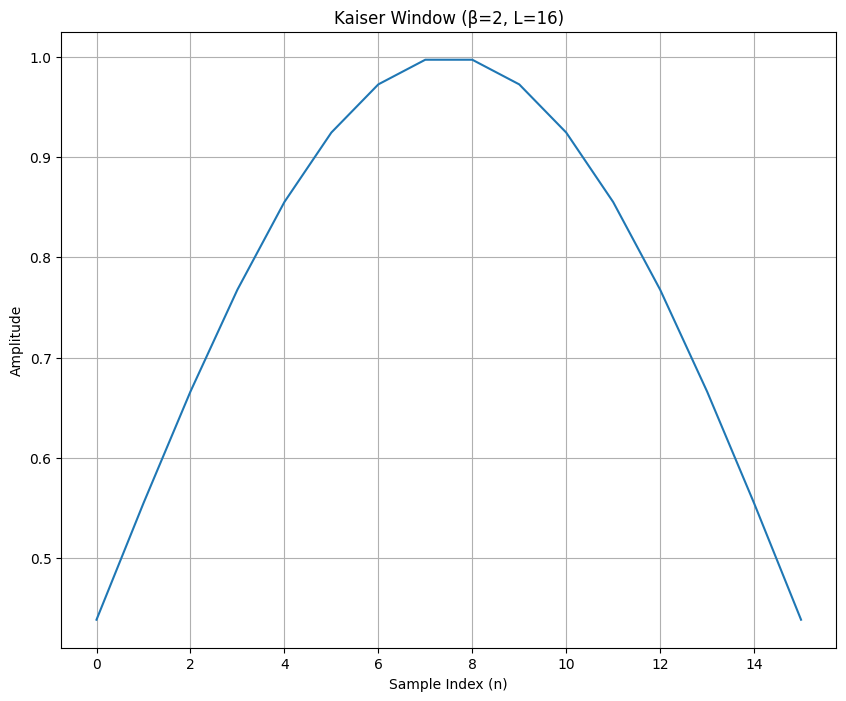

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Kaiser Window
hk = np.kaiser(16, 2)

# Plot Kaiser Window
plt.figure(figsize=(10, 8))
plt.plot(hk)
plt.grid()
plt.title('Kaiser Window (β=2, L=16)')
plt.xlabel('Sample Index (n)')
plt.ylabel('Amplitude')
plt.show()


Kita peroleh respon frekuensinya dengan:

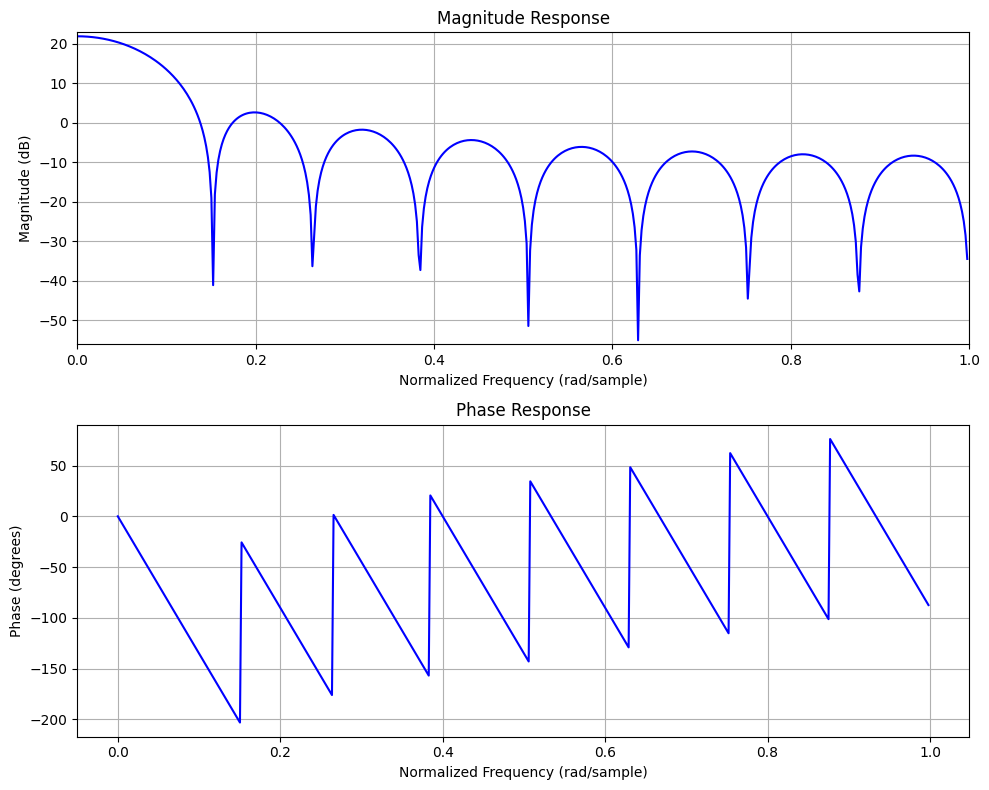

In [14]:
freqz(hk)

ᅠDi sini kita dapat melihat bahwa lobus utama (pass band dan pita transisi), untuk $\beta$ ini, bahkan lebih sempit daripada jendela sinus, lobus sisi pertama juga memiliki redaman sekitar -20 dB, tetapi lobus samping selanjutnya tidak memiliki banyak peningkatan redaman.

Untuk $\beta=8$ kita memperoleh:

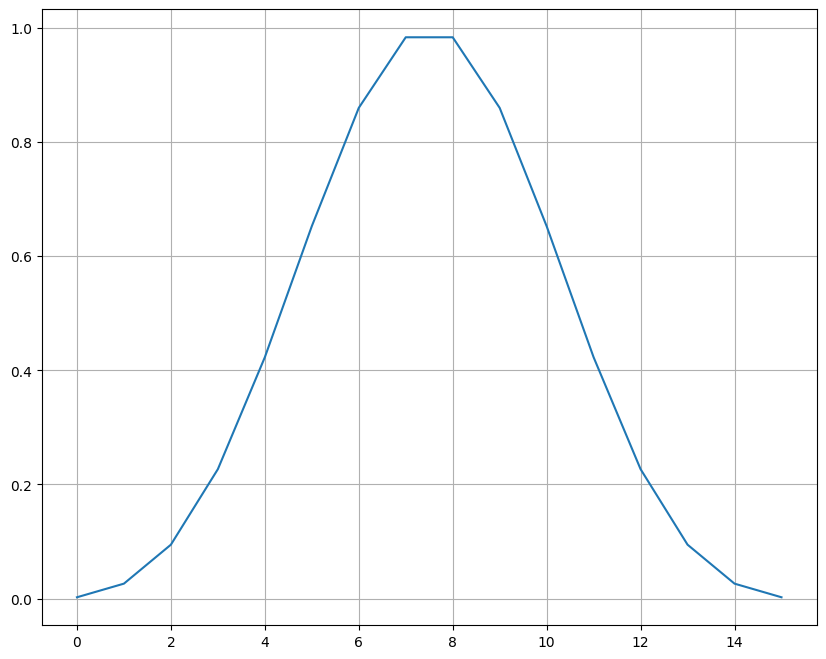

In [15]:
hk=np.kaiser(16,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Dan untuk respon frekuensinya kita dapat peroleh

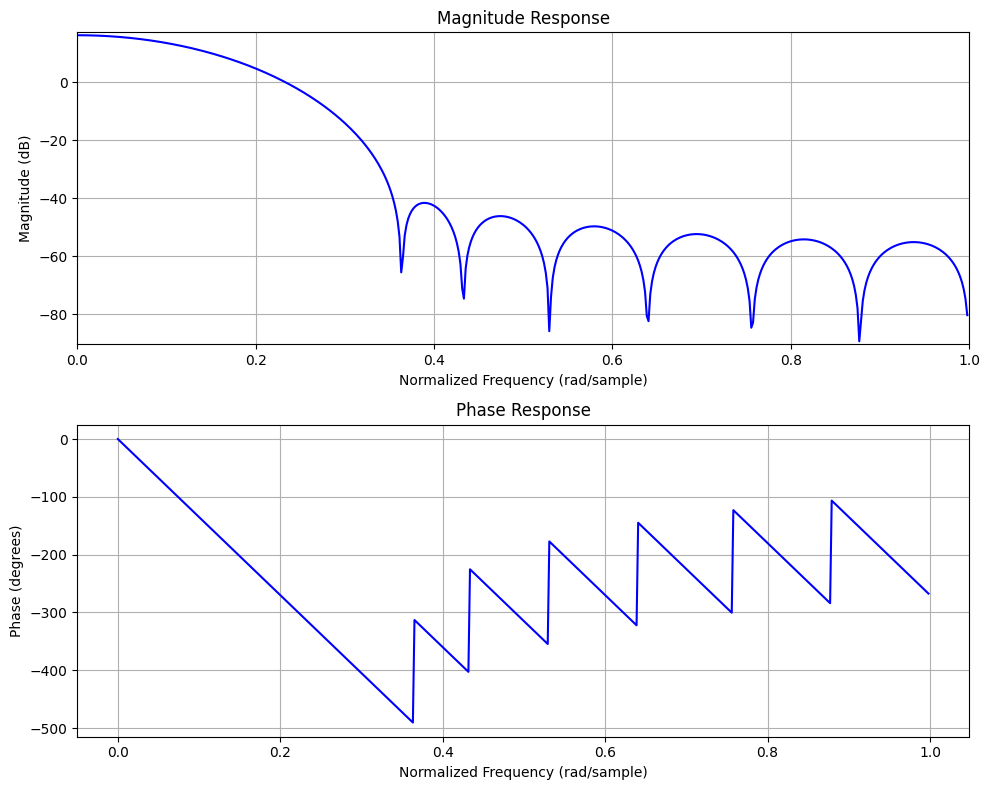

In [16]:
freqz(hk)

Di sini kita sekarang dapat melihat ekstrem lainnya, dengan lobus utama yang sangat lebar (pita lintasan dan transisi), tetapi lobus sisi pertama dengan redaman sekitar -60 dB, yang akan memenuhi persyaratan kita!

## Vorbis

Vorbis memiliki persamaan window seperti berikut:

$$\large
{h ( n ) =sin \left ( {  \frac{π}  {2} } sin \left ( {  \frac{π}    {L} }  ( n+0 .5 )  \right ) ^ { {2} }  \right )}
$$, n=0,…,L-1
 (dari :http://xiph.org/vorbis/doc/Vorbis_I_spec.pdf).

Untuk L=16 kita peroleh:


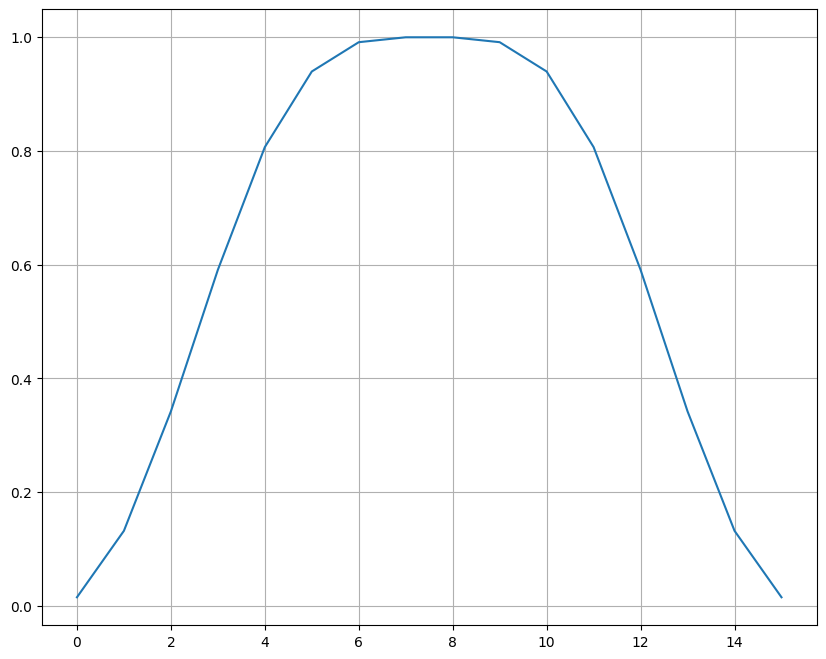

In [17]:
sq=np.sin(np.pi/2*(np.sin(np.pi/16*(np.arange(16)+0.5))**2))

plt.figure(figsize=(10,8))
plt.plot(sq)
plt.grid()

Respon frekuensinya adalah:

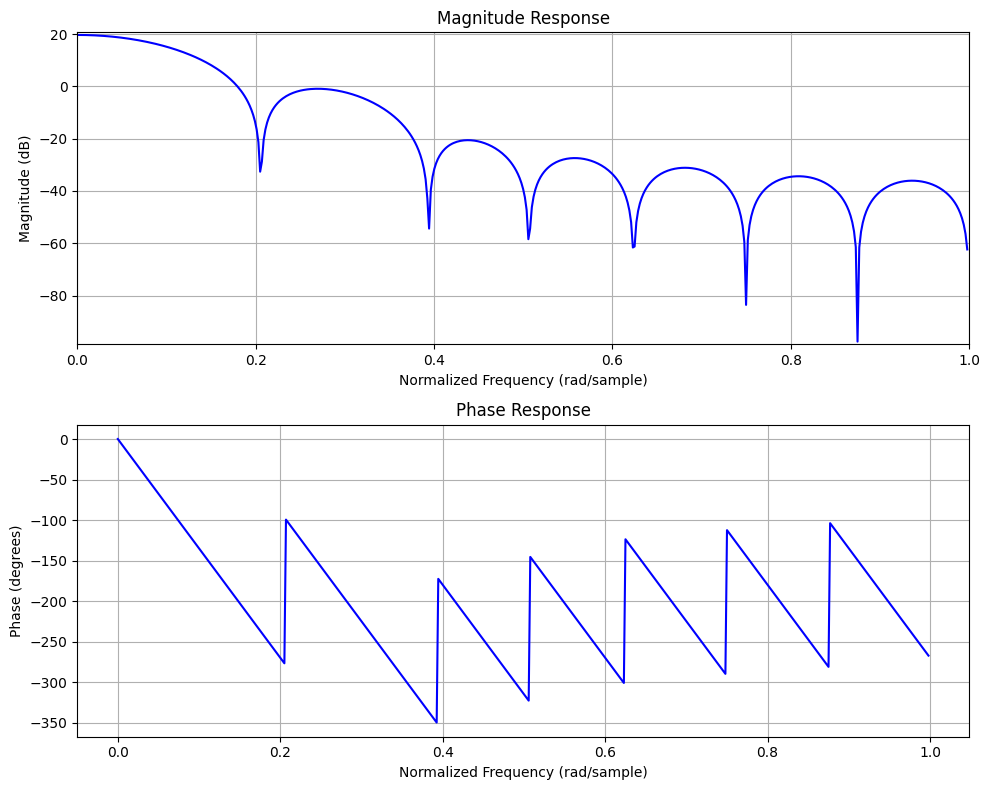

In [18]:
freqz(sq)

Di sini kita dapat melihat bahwa lobus utama lebih lebar daripada jendela sinus, lobus sisi pertama juga memiliki redaman pita stop sekitar -20 dB, namun lobus samping selanjutnya meningkatkan redamannya lebih dari jendela sinus.

Ini menghasilkan redaman stopband yang baik, tetapi tidak memiliki parameter tambahan seperti yang kita lihat di jendela Kaiser.

Pembuat kode audio MPEG AAC juga menggunakan fungsi jendela yang dioptimalkan, yang disebut jendela **Kaiser-Bessel Derived (KBD)**, yang dihasilkan dari **optimasi numerik.**